In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('startup_funding.csv')
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


## Question 1
Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  __Bangalore, Mumbai, and NCR__. As a friend, you want to help your friend deciding the location.   
Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding.   
 - NCR includes Gurgaon, Noida and New Delhi. 
 - Take city name "Delhi" as "New Delhi".
 - Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". 
 - For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.


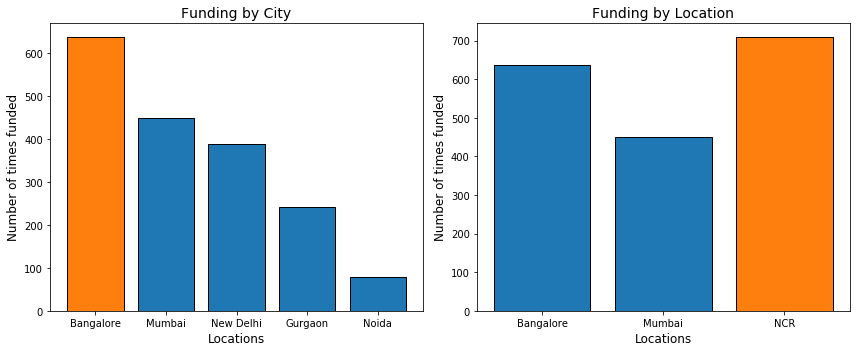

In [3]:
df['CityLocation'].fillna('0',inplace = True) #unknown locations replaced by '0'
df['CityLocation'].replace('bangalore','Bangalore',inplace = True) #correcting city names
df['CityLocation'].replace('Delhi','New Delhi',inplace = True)

target_cities = ['Bangalore','Mumbai','Gurgaon','Noida','New Delhi'] #target cities as specified in question
targets = [c.lower() for c in target_cities]

d = {}
for _,row in df.iterrows():
    locations = row['CityLocation'].split('/') #separating cities or locations
    for l in locations:
        l = l.strip()
        if l.lower() in targets:
            d[l]=d.get(l,0)+1  


vals = np.array(list(d.values()))
i = vals.argmax()
colors = ['tab:blue' for i in range(len(vals))]
colors[i]='tab:orange' # orange bar indicates most favourable location



fig,axs = plt.subplots(1,2, figsize=(12,5)) #to make plots side by side

axs[0].bar(d.keys(),d.values(),edgecolor ='black',color = colors)
axs[0].set_title("Funding by City", fontsize = 14)
axs[0].set_xlabel('Locations', fontsize=12)
axs[0].set_ylabel('Number of times funded', fontsize=12)


# Combining cities under NCR into one location
d['NCR'] = d['New Delhi']+d['Gurgaon']+d['Noida']
del d['New Delhi']
del d['Gurgaon']
del d['Noida']


vals = np.array(list(d.values()))
i = vals.argmax()
colors = ['tab:blue' for i in range(3)]
colors[i]='tab:orange'


axs[1].bar(d.keys(),d.values(),edgecolor ='black',color = colors,width = 0.8)
axs[1].set_title("Funding by Location", fontsize=14)
axs[1].set_xlabel('Locations', fontsize=12)
axs[1].set_ylabel('Number of times funded', fontsize=12)

plt.tight_layout()
plt.show()

## Question 2
Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors.  
 - Find the top 5 investors who have invested maximum number of times
 - Consider repeat investments in one company also 
 - In a startup, multiple investors might have invested. So consider each investor for that startup. 
 - Ignore undisclosed investors.

Sequoia Capital 64
Accel Partners 52
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


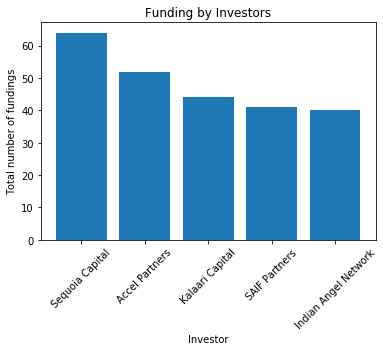

In [4]:
df = pd.read_csv('startup_funding.csv')

df['InvestorsName'].fillna('0',inplace = True)
d = {}
for _,row in df.iterrows():
    x = row['InvestorsName']
    names = x.split(',')
    for name in names:
        if 'undisclosed' in name.lower(): #ignoring undisclosed investors
            break
        else:
            name = name.strip()
            d[name]=d.get(name,0)+1

d = sorted(d.items(), key=lambda x: x[1], reverse=True)[:5] # d is now a list of tuples (investor, count) 
# sorted in descending order of count


investors = [t[0] for t in d]
counts = [t[1] for t in d]
for i in range(len(d)):
    print(investors[i],counts[i])
    
plt.bar(investors,counts)
plt.title('Funding by Investors')
plt.xlabel('Investor')
plt.ylabel('Total number of fundings')
plt.xticks(rotation = 45, horizontalalignment = 'center')
plt.show()

## Question 3
After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. 
 - Find the top 5 investors who have invested maximum number of times in different companies (if one investor has invested multiple times in one startup, count one for that company)
 - There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [5]:
df = pd.read_csv('startup_funding.csv')

names = df['StartupName']
name_corrections = set()
for x in names:
    if 'ola' in x.lower() or 'flipkart' in x.lower() or 'oyo' in x.lower() or 'paytm' in x.lower():
        name_corrections.add(x)
        
name_corrections # used to find corrections to be made in startup names (in the next cell)

{'Applied Solar Technologies',
 'EzySolare',
 'Flipkart',
 'Flipkart.com',
 'FroyoFit',
 'HolaChef',
 'Holachef',
 'Kolabro',
 'OYO Rooms',
 'OYOfit',
 'Ola',
 'Ola Cabs',
 'Olacabs',
 'Oriano Solar',
 'Oyo',
 'Oyo Rooms',
 'OyoRooms',
 'Oyorooms',
 'Paytm',
 'Paytm Marketplace',
 'SolarTown',
 'Truckola'}

Sequoia Capital 48
Accel Partners 46
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


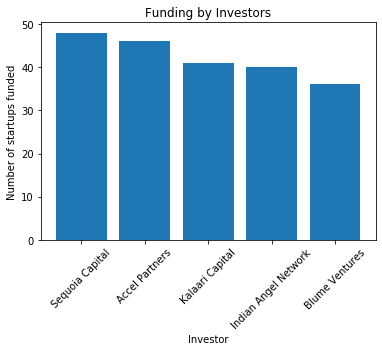

In [6]:
# Making necessary corrections in startup names
x = dict.fromkeys(['OYO Rooms', 'Oyo Rooms','OyoRooms','Oyorooms'], 'Oyo')
y = dict.fromkeys(['Ola Cabs','Olacabs'],'Ola')
df['StartupName']=df['StartupName'].replace(x)
df['StartupName']=df['StartupName'].replace(y)
df['StartupName']=df['StartupName'].replace({"Flipkart.com":"Flipkart"})
df['StartupName']=df['StartupName'].replace({'Paytm Marketplace':'Paytm'})
df['InvestorsName'].fillna('0',inplace = True) #nan handling of unknown investors

d = {}
# d is a dictionary which uses investors as keys for which value is another dictionary with
# startup names as keys and number of investments made in that startup as value
# for ex 'Sequoia Capital': {'Ola':5, 'Flipkart':2} could be a key value pair in d (so Sequoia would have invested
# 5 times in Ola and twice in Flipkart)

for _,row in df.iterrows():
    x = row['InvestorsName'].strip().rstrip(',') # trailing comma caused ' ' to appear as investor name so it had to be removed
    startup = row['StartupName'].strip()
    names = x.split(',')
    for name in names:
        if 'undisclosed' in name.lower(): #ignoring undisclosed investors
            break
        else:
            name = name.strip()
            if name in d:
                if startup in d[name]:
                    d[name][startup]+=1
                else:
                    d[name][startup]=1
            else:
                d[name]={}
                d[name][startup]=1


d2 = {}
#counts number of startups an investor has invested in, as is required by question
# ex: 'Sequoia Capital': 2 could be a key value pair in d2 corresponding to example key-value pair in d 
# i.e. Sequoia Capital invested in 2 startups (ola and flipkart)

for investor in d:
    d2[investor] = len(d[investor])
    
d2 = sorted(d2.items(), key=lambda x: x[1], reverse=True)[:5] # d2 is now a list of tuples (investor, count) 
# sorted in descending order of count

investors = [t[0] for t in d2]
counts = [t[1] for t in d2]
for i in range(len(d2)):
    print(investors[i],counts[i])
    
plt.bar(investors,counts)
plt.xticks(rotation = 45, horizontalalignment = 'center')
plt.title('Funding by Investors')
plt.xlabel('Investor')
plt.ylabel('Number of startups funded')
plt.show()

## Question 4
Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor.   Since your friend startup is at an early stage startup, the best-suited investment type would be - __Seed Funding and Crowdfunding__. 
 - Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. 
 - Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. 
 - There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [7]:
df = pd.read_csv('startup_funding.csv')
df.InvestmentType.fillna('0',inplace = True)
set(df['InvestmentType']) # used to find corrections to be made in investment type (in the next cell)

{'0',
 'Crowd Funding',
 'Crowd funding',
 'Debt Funding',
 'Private Equity',
 'PrivateEquity',
 'Seed Funding',
 'SeedFunding'}

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


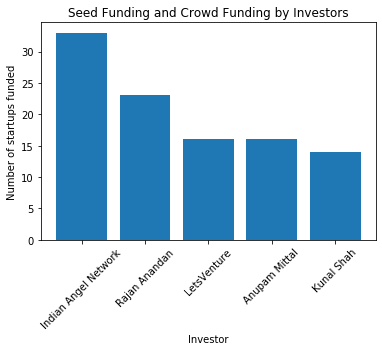

In [8]:
# corrections
df = pd.read_csv('startup_funding.csv')
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace = True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace = True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace = True)
df['AmountInUSD'].fillna('0',inplace = True) # nan handling of funding column

x = dict.fromkeys(['OYO Rooms', 'Oyo Rooms','OyoRooms','Oyorooms'], 'Oyo')
y = dict.fromkeys(['Ola Cabs','Olacabs'],'Ola')
df['StartupName']=df['StartupName'].replace(x)
df['StartupName']=df['StartupName'].replace(y)
df['StartupName']=df['StartupName'].replace({"Flipkart.com":"Flipkart"})
df['StartupName']=df['StartupName'].replace({'Paytm Marketplace':'Paytm'})
df['InvestorsName'].fillna('0',inplace = True) # unknown investor names replaced by '0'

d = {}
# d is a dictionary which uses investors as keys for which value is another dictionary with
# startup names as keys and number of investments made in that startup as value
# for ex 'Sequoia Capital': {'Ola':5, 'Flipkart':2} could be a key value pair in d (so Sequoia would have invested
# 5 times in Ola and twice in Flipkart)

for _,row in df.iterrows():
    x = row['InvestorsName'].strip().rstrip(',') # trailing comma caused ' ' to appear as investor name so it had to be removed
    itype = row['InvestmentType']
    if itype=='Seed Funding' or itype=='Crowd Funding':
        startup = row['StartupName'].strip()
        names = x.split(',')
        for name in names:
            if 'undisclosed' in name.lower(): #ignoring undisclosed investors
                break
            else:
                name = name.strip()
                if name in d:
                    if startup in d[name]:
                        d[name][startup]+=1
                    else:
                        d[name][startup]=1
                else:
                    d[name]={}
                    d[name][startup]=1


d2 = {} #counts number of startups an investor has invested in, as is required by question
# ex: 'Sequoia Capital': 2 could be a key value pair in d2 corresponding to example key-value pair in d 
# i.e. Sequoia Capital invested in 2 startups (ola and flipkart)

for investor in d:
    d2[investor] = len(d[investor])
    
d2 = sorted(d2.items(), key=lambda x: x[1], reverse=True)[:5] # d2 is now a list of tuples (investor, count) 
# sorted in descending order of count

investors = [t[0] for t in d2]
counts = [t[1] for t in d2]
for i in range(len(d2)):
    print(investors[i],counts[i])
    
plt.bar(investors,counts)
plt.xticks(rotation = 45, horizontalalignment = 'center')
plt.title('Seed Funding and Crowd Funding by Investors')
plt.xlabel('Investor')
plt.ylabel('Number of startups funded')
plt.show()

## Question 5
Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type.   
Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is __Private Equity__. 
 - Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. 
 - Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.
 - There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Sequoia Capital 45
Accel Partners 42
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


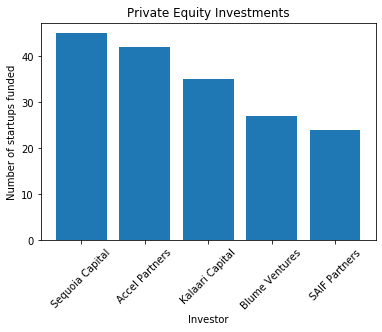

In [9]:
# Investent type spellings have already been corrected
# Startup Name spellings have already been corrected
# nan values have been handled

d = {}
for _,row in df.iterrows():
    x = row['InvestorsName'].strip().rstrip(',')
    itype = row['InvestmentType']
    if itype=='Private Equity':
        startup = row['StartupName'].strip()
        names = x.split(',')
        for name in names:
            if 'undisclosed' in name.lower():
                break
            else:
                name = name.strip()
                if name in d:
                    if startup in d[name]:
                        d[name][startup]+=1
                    else:
                        d[name][startup]=1
                else:
                    d[name]={}
                    d[name][startup]=1


d2 = {}
for investor in d:
    d2[investor] = len(d[investor])
    
d2 = sorted(d2.items(), key=lambda x: x[1], reverse=True)[:5]

investors = [t[0] for t in d2]
counts = [t[1] for t in d2]
for i in range(len(d2)):
    print(investors[i],counts[i])
    
plt.bar(investors,counts)
plt.xticks(rotation = 45, horizontalalignment = 'center')
plt.title('Private Equity Investments')
plt.xlabel('Investor')
plt.ylabel('Number of startups funded')
plt.show()